In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import statistics as st
from statistics import mean
from statistics import median
from statistics import variance
from scipy import stats
import scipy.stats as scst
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import t

import matplotlib.pyplot as plt
import pylab 


In [96]:
#Q1
data = pd.read_csv(r"midterm_marks" ,sep = ",")
#print(data)
mark = data['x']
print(mark)

0     15.0
1     18.0
2     27.0
3     20.0
4     15.0
      ... 
93     7.0
94    24.0
95     6.5
96    22.0
97    27.5
Name: x, Length: 98, dtype: float64


In [97]:
print(mean(mark))
print(np.std(mark))
mu0 = 20
df = len(mark) - 1

17.5
7.297609337366335


In [99]:
test = (mean(mark - mu0))/math.sqrt(variance(mark)/len(mark))  # test statistic

#p-value for 1 sided left: Ho: mu < mu0
print(t.cdf(test,df)) # Pr( t < = test) where t ~ t_df.

#print(t.ppf(0.975, df) ) # quantile value of t distribution such that the left area is 0.975

0.0005330460359976668


In [100]:
CI = [mean(mark) - t.ppf(0.975, df)*math.sqrt(variance(mark)/len(mark)), mean(mark) + t.ppf(0.975, df)*math.sqrt(variance(mark)/len(mark))]
CI

[16.029399576560703, 18.970600423439297]

In [101]:
# built-in function to test:
test, p = stats.ttest_1samp(mark, popmean=mu0) # by default, this is a 2 sided test.
print(test)
print(p) #  p-value for 2 sided test

-3.374001452560113
0.0010660920719953336


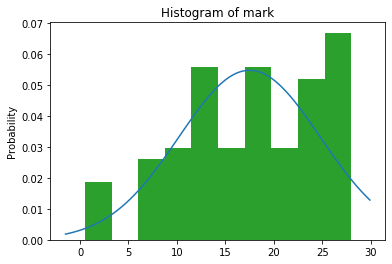

In [102]:
## Checking assumptions made: data is approximately normaly distributed
# histogram
inter = (max(mark) - min(mark) )/(len(mark)) 
l = list(np.arange((min(mark) - 2),(max(mark) + 2),step = inter))
y = scst.norm.pdf(l,loc = mean(mark),scale = np.std(mark))

plt.plot(l, y)
plt.hist(mark, bins=None, range=None, density=True, color='C2')
plt.title('Histogram of mark') 
plt.xlabel('') 
plt.ylabel('Probability') 
plt.show()

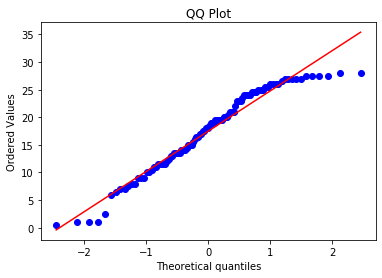

In [105]:
######################  QQ PLOTS
scst.probplot(mark, dist="norm", plot=pylab)
pylab.title('QQ Plot') 
pylab.show()

In [ ]:
# Normal: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# Exponential: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
# t distribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [2]:
#Q2
data = pd.read_csv(r"glaucoma_dep.csv" ,sep = ",")
print(data)



   glaucoma  unaffected  diff
0       488         484     4
1       468         478   -10
2       480         492   -12
3       426         444   -18
4       440         436     4
5       402         398     4
6       458         464    -6
7       460         476   -16


In [10]:
# (a) paired t-test for the matched of "glaucoma" and "unaffected"
test = scst.ttest_rel(data['glaucoma'], data['unaffected'], axis=0) #two sided test
print(test)
#two sided test has p-value  = 0.0968 with a negative statistic
#hence, 1 sided p-value (left test) has p-value of 0.0484

Ttest_relResult(statistic=-1.9166073440240927, pvalue=0.09681187115856855)


In [11]:
#(b)to perform 2 independent samples t-test then
#need to test if variances are equal first, using Barlett test:

scipy.stats.bartlett(data['glaucoma'], data['unaffected'])  
#large p-value suggest two samples have equal variances

BartlettResult(statistic=0.05100586181209413, pvalue=0.8213221522022819)

In [12]:
#2 independent samples t-test:
import statsmodels.api
test= statsmodels.stats.weightstats.ttest_ind(data['glaucoma'], data['unaffected'], alternative='smaller', usevar='pooled', value=0)
print(test) 
#p-value = 0.34171

(-0.41641061980739086, 0.34171155306419165, 14.0)
